In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
#%matplotlib notebook

### Write Fonksiyonu

In [2]:
def mypgmwrite(filename,data):
    magic_number = "P5"
    max_val = 255
    height = len(data)
    width = len(data[0])
    header = f'{magic_number}\n{str(width)} {str(height)}\n{str(max_val)}\n'
    
    with open(filename,'wb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        f.write(header.encode())#Encode ile stringleri UTF-8 veya başka bir kodlama tekniğiyle kodlar.
        for i in range(height):
            for j in range(width):
                f.write(int(data[i][j]).to_bytes(1,'big'))#1 byte 0-255 arası olduğu için 1 byte a çeviriyoruz. Maxval 255 olmasaydı bu da farklı olurdu.

### Read Fonksiyonu

In [3]:
def mypgmread(filename):
    with open(filename,'rb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        magic_word = f.readline().strip().decode() #Magicword. Strip metodu ile stringin başında ve sonundaki boşlukları kaldırıyoruz.
        comment = '#'
        f_content = f.readline().decode()
        while(f_content[0] == '#'):#Yorum satırlarını ayırt etmek için.
            f_content = f.readline()
#split metodu default olarak stringi boşluklardan ayırır. kelime kelime listeler.
        [width,height] = f_content.split()
        width = int(width)
        height = int(height)
        maxval = f.readline().decode()
        maxval = int(maxval)
        #print(magic_word)
        #print(f'width: {width}, height: {height}')
       # print(maxval)
        i = 0
        j = 0
        imgValue = [[0 for i in range(width)] for j in range(height)]
        byte = f.read(1)
        counter = 0
        while(counter != width*height):
            #print(f'i = {i}\nj = {j}')
            imgValue[i][j] = ord(byte)
            #print(f'byte {ord(byte)}')
            j += 1
            counter += 1
            if(j == width):
                i += 1
                j = 0
            byte = f.read(1)
    return magic_word,width,height,maxval,imgValue

### 3.20 Histogram equalization

In [208]:
def calculateHistogram(data,width,height,maxval):
    histogramData = np.array([0 for i in range(maxval+1)],dtype=float)
    for i in range(height):
        for j in range(width):
            histogramData[data[i][j]] += 1 #[data[i][j]] ile o piksel kaç ise o indeksteki değeri 1 arttırarak hangi pikselden kaç tane olduğunun verisi tutuluyor.
    histogramData = histogramData/(width*height) #normalize edildi
    return histogramData

    

In [209]:
def calculateCdf(histogramVal,width,height,maxval):
    #pdf = np.array([histogramVal[i]/(width*height) for i in range(maxval+1)],dtype=float)
    cdf = np.array([0 for i in range(maxval+1)],dtype=float)
    for i in range(maxval+1):
        if(i!=0): #0-1=-1 olacağından ilk veri için şart koyuldu.
            cdf[i] += histogramVal[i]+cdf[i-1]
        else:
            cdf[i] = histogramVal[i]
    return cdf

In [210]:
def histogramEqualization(data,cdf,width,height,maxval):
    L = maxval+1
    dummyPixels = np.array([0 for i in range(L)])
    newData = np.array([[0 for i in range(len(data[0]))] for j in range(len(data))])
#aşağıdaki newcdf L-1 ile cdfteki değerlerin çarpımıyla oluşan değerlerin yuvarlanmış hallerini veriyor. Yani yeni s değerleri. 
    newcdf = np.array([np.round(cdf[i]*(L-1)) for i in range(L)])
    newcdf = newcdf.astype(int)
    print(newcdf)
    print(np.sum(newcdf))
    for i in range(height):
        for j in range(width):
            newData[i][j] = newcdf[data[i][j]] #orijinal görüntüdeki pixelleri yeni s değerleriyle değiştiriliyor.
            #newcdf dizisindeki her indeks o pixeli ifade eder yani newcdf[5] = r=5 e denk gelen s değeri. Bu yüzden döngüde
            #data o an hangi pixel ise newcdf'te ona karşılık gelen ile yer değiştiriliyor.
    return newData

### Histogram of dark image

Text(0, 0.5, 's')

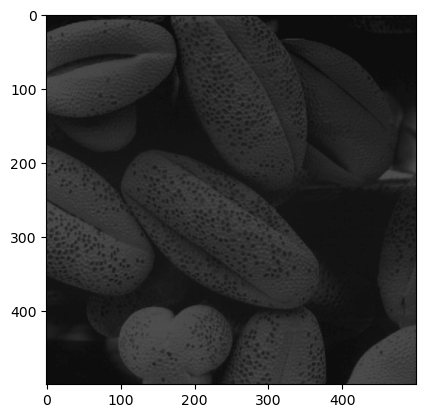

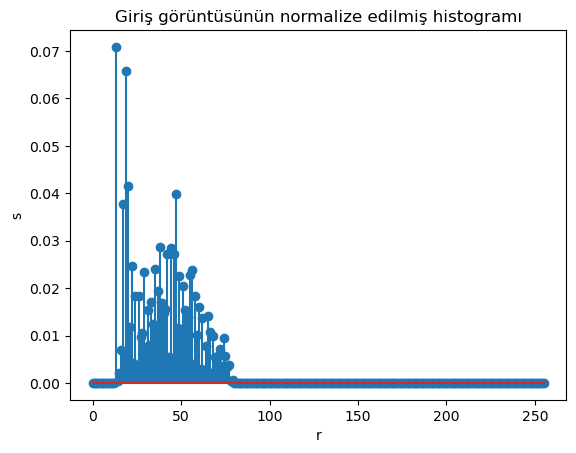

In [211]:
mw,width,height,maxval,data = mypgmread("fig0320_4.pgm")
plt.imshow(data,cmap='gray',vmin=0,vmax=255)
histogramVal = calculateHistogram(data,width,height,maxval)
t = np.arange(maxval+1)
plt.figure()
plt.stem(t,histogramVal)
plt.title("Giriş görüntüsünün normalize edilmiş histogramı")
plt.xlabel("r")
plt.ylabel("s")




<StemContainer object of 3 artists>

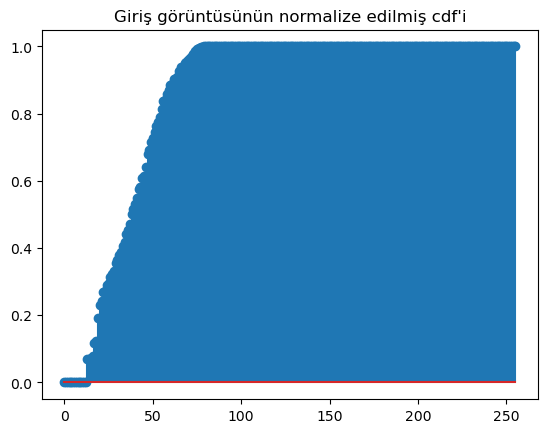

In [212]:
cdf = calculateCdf(histogramVal,width,height,maxval)
plt.title("Giriş görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,cdf)

[  0   0   0   0   0   0   0   0   0   0   0   0   0  18  18  19  20  30
  32  49  59  62  68  69  74  75  80  82  85  91  93  97  99 103 106 112
 115 120 128 132 136 140 147 148 155 157 164 174 177 182 185 190 194 198
 202 207 213 214 219 222 226 227 230 231 233 236 239 240 242 244 245 246
 248 249 251 253 254 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

<StemContainer object of 3 artists>

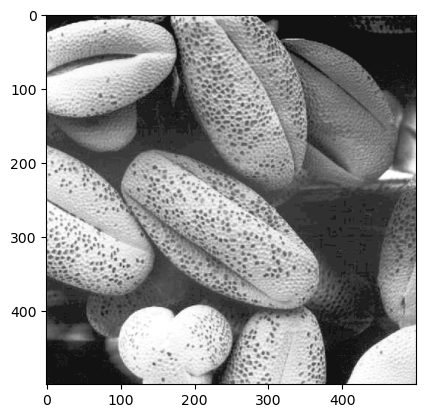

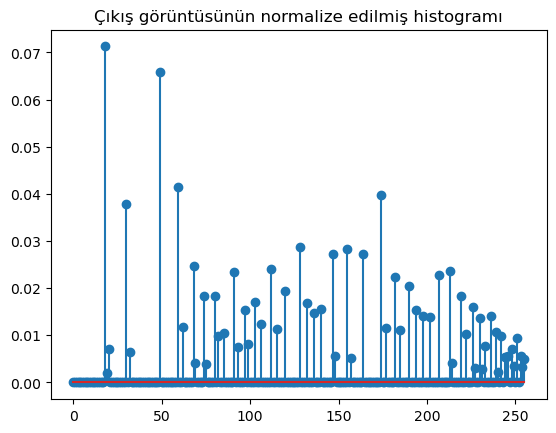

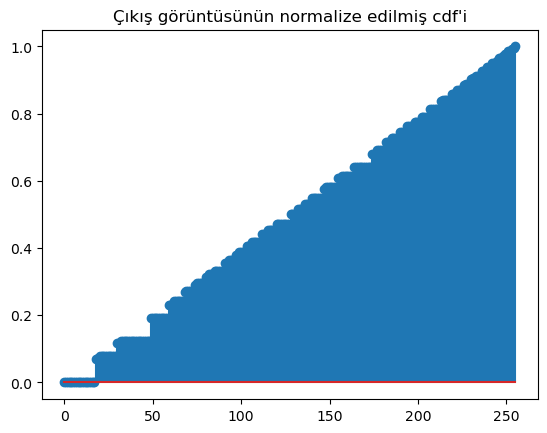

In [214]:
newData = histogramEqualization(data,cdf,width,height,maxval)
plt.imshow(newData,cmap='gray',vmin=0,vmax=255)
newHistogram = calculateHistogram(newData,width,height,maxval)
plt.figure()
plt.title("Çıkış görüntüsünün normalize edilmiş histogramı")
plt.stem(t,newHistogram)

plt.figure()
newcdf = calculateCdf(newHistogram,width,height,maxval)
plt.title("Çıkış görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,newcdf)

### Histogram of light image

Text(0, 0.5, 's')

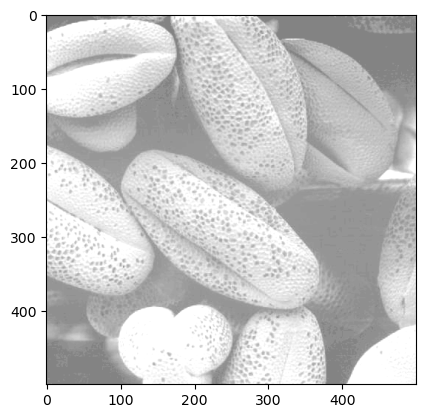

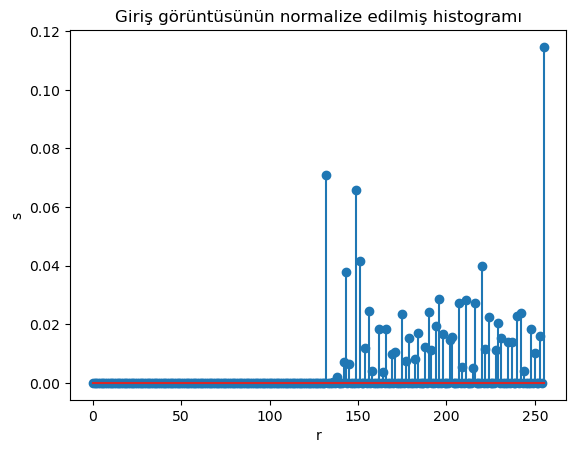

In [220]:
mw,width,height,maxval,data = mypgmread("fig0320_1.pgm")
plt.imshow(data,cmap='gray',vmin=0,vmax=255)


histogramVal = calculateHistogram(data,width,height,maxval)
t = np.arange(maxval+1)
plt.figure()
plt.stem(t,histogramVal)
plt.title("Giriş görüntüsünün normalize edilmiş histogramı")
plt.xlabel("r")
plt.ylabel("s")

<StemContainer object of 3 artists>

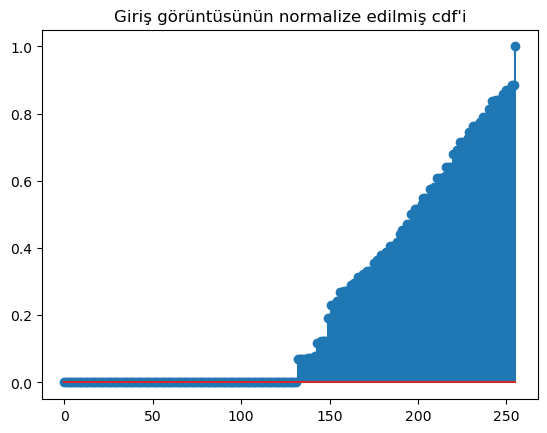

In [217]:
cdf = calculateCdf(histogramVal,width,height,maxval)
plt.title("Giriş görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,cdf)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  18  18  18  18  18  18  19  19  19  19  20  30
  30  32  32  32  32  49  49  59  59  59  62  62  68  68  69  69  69  69
  74  74  75  75  80  80  80  82  82  85  85  85  85  91  91  93  93  97
  97  97  99  99 103 103 103 103 106 106 112 115 115 115 120 120 128 128
 132 132 132 132 136 140 140 140 140 147 147 148 148 155 155 155 155 157
 164 164 164 164 174 174 177 177 182 182 182 182 185 190 190 194 194 194
 194 198 198 202 202 202 207 207 213 213 214 214 21

<StemContainer object of 3 artists>

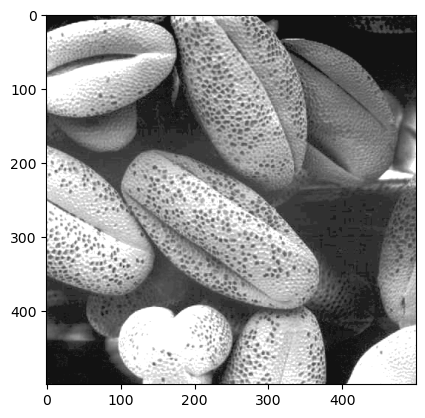

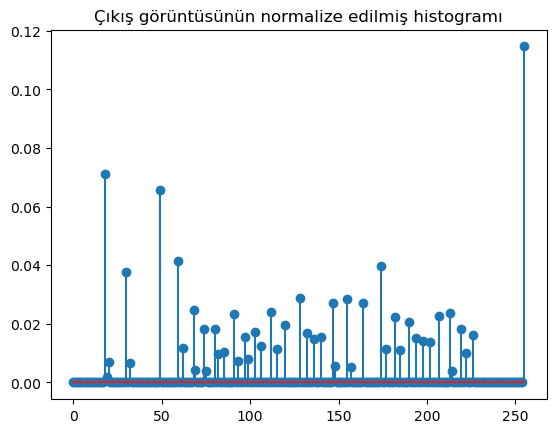

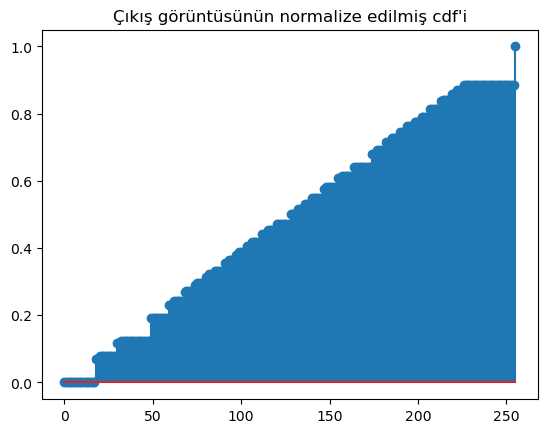

In [218]:
newData = histogramEqualization(data,cdf,width,height,maxval)
plt.imshow(newData,cmap='gray',vmin=0,vmax=255)
newHistogram = calculateHistogram(newData,width,height,maxval)
plt.figure()
plt.title("Çıkış görüntüsünün normalize edilmiş histogramı")
plt.stem(t,newHistogram)

plt.figure()
newcdf = calculateCdf(newHistogram,width,height,maxval)
plt.title("Çıkış görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,newcdf)

### Histogram of low-contrast image

138


Text(0, 0.5, 's')

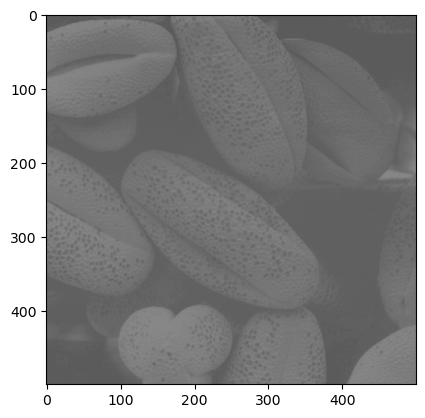

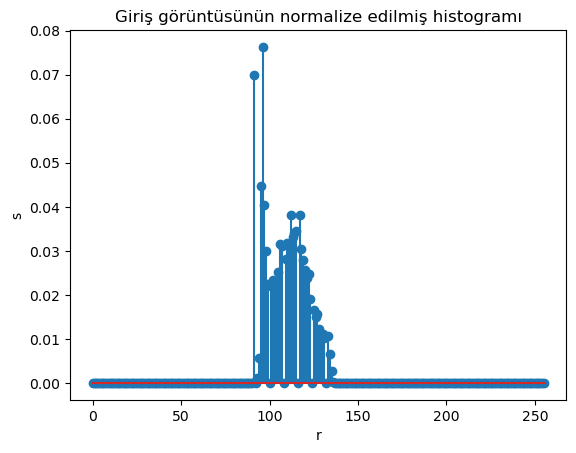

In [221]:
mw,width,height,maxval,data = mypgmread("fig0320_2.pgm")
plt.imshow(data,cmap='gray',vmin=0,vmax=255)
print(np.max(data))

histogramVal = calculateHistogram(data,width,height,maxval)
t = np.arange(maxval+1)
plt.figure()
plt.stem(t,histogramVal)
plt.title("Giriş görüntüsünün normalize edilmiş histogramı")
plt.xlabel("r")
plt.ylabel("s")

<StemContainer object of 3 artists>

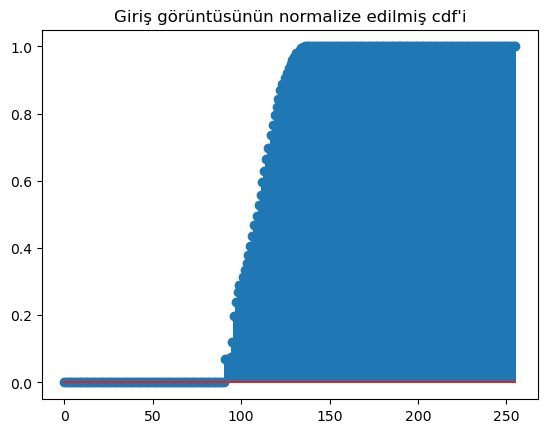

In [222]:
cdf = calculateCdf(histogramVal,width,height,maxval)
plt.title("Giriş görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,cdf)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  18  18  18  20  31  50  61  68  74  74  80  86  91  97 103 111 119
 119 126 134 143 152 161 169 178 178 188 196 203 209 215 222 227 227 231
 235 239 242 244 247 250 250 253 254 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

<StemContainer object of 3 artists>

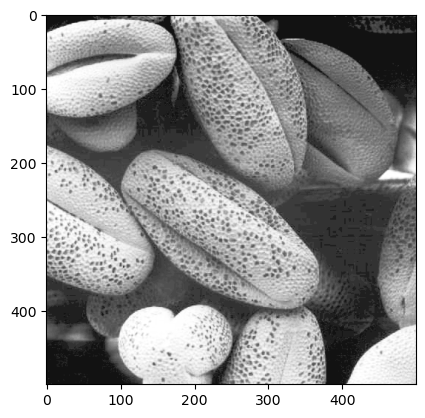

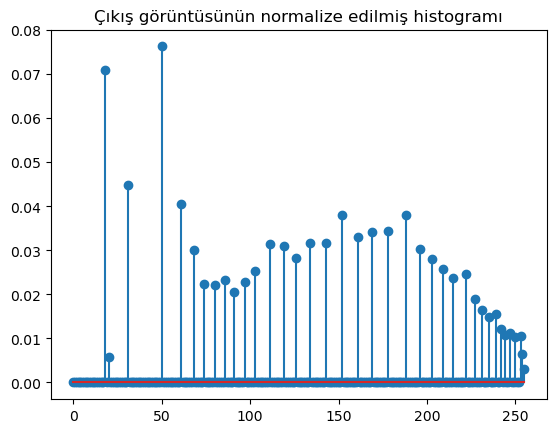

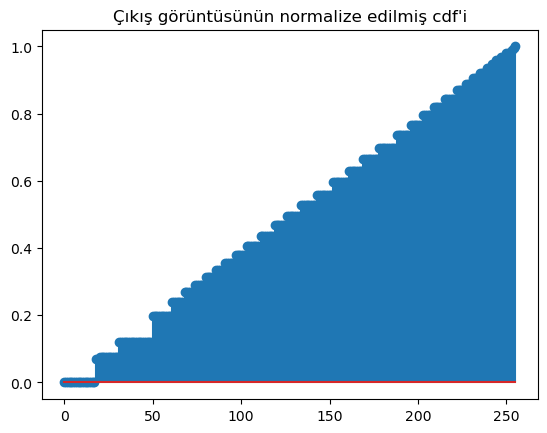

In [223]:
newData = histogramEqualization(data,cdf,width,height,maxval)
plt.imshow(newData,cmap='gray',vmin=0,vmax=255)
newHistogram = calculateHistogram(newData,width,height,maxval)
plt.figure()
plt.title("Çıkış görüntüsünün normalize edilmiş histogramı")
plt.stem(t,newHistogram)

plt.figure()
newcdf = calculateCdf(newHistogram,width,height,maxval)
plt.title("Çıkış görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,newcdf)

### Histogram of high-contrast image

Text(0, 0.5, 's')

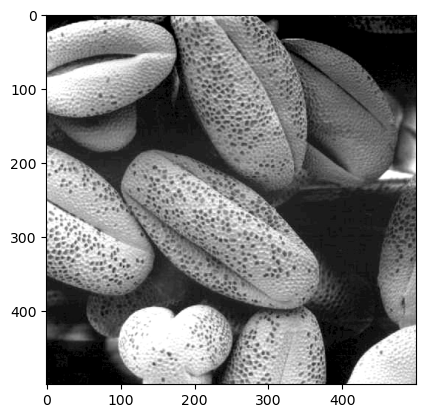

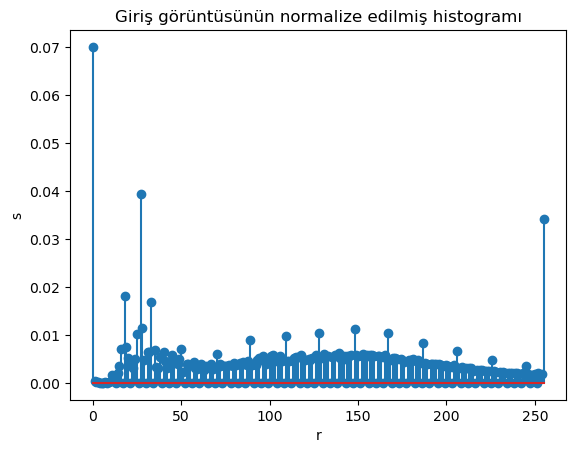

In [225]:
mw,width,height,maxval,data = mypgmread("fig0320_3.pgm")
plt.imshow(data,cmap='gray',vmin=0,vmax=255)

histogramVal = calculateHistogram(data,width,height,maxval)
t = np.arange(maxval+1)
plt.figure()
plt.stem(t,histogramVal)
plt.title("Giriş görüntüsünün normalize edilmiş histogramı")
plt.xlabel("r")
plt.ylabel("s")

<StemContainer object of 3 artists>

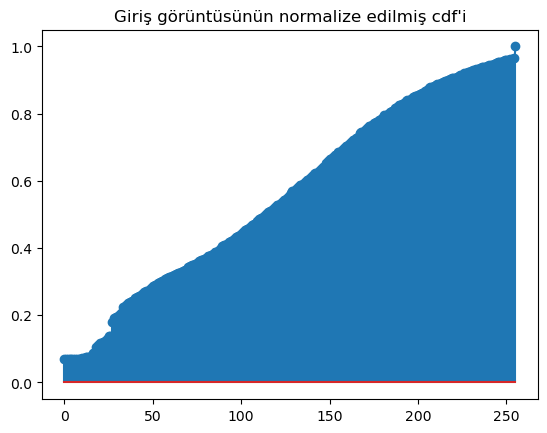

In [226]:
cdf = calculateCdf(histogramVal,width,height,maxval)
plt.title("Giriş görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,cdf)

[ 18  18  18  18  18  18  18  18  18  18  18  19  19  19  20  20  22  22
  27  29  30  30  31  32  33  36  36  46  49  50  50  51  53  57  57  59
  60  61  62  62  64  65  66  66  67  68  69  69  70  72  74  74  74  75
  76  77  77  78  79  80  80  81  82  82  83  83  84  85  86  86  87  88
  89  89  90  91  92  93  93  94  95  96  96  97  98  99  99 100 101 103
 104 104 105 106 108 108 109 110 111 111 112 114 115 117 117 118 119 120
 120 123 124 125 125 126 128 129 130 130 132 133 134 134 136 137 138 138
 140 141 144 145 145 147 148 149 149 151 152 154 154 155 157 158 159 159
 161 162 164 164 166 168 169 169 171 172 174 175 175 177 178 180 180 181
 182 184 184 185 187 189 190 190 192 193 194 194 196 197 198 198 199 200
 202 203 203 204 205 206 206 208 209 210 210 211 212 213 214 214 215 216
 217 217 218 219 220 220 221 222 223 224 224 225 226 227 227 227 228 229
 229 229 230 231 231 231 232 233 233 233 235 235 236 236 236 237 237 238
 238 239 239 240 240 240 241 241 241 242 242 243 24

<StemContainer object of 3 artists>

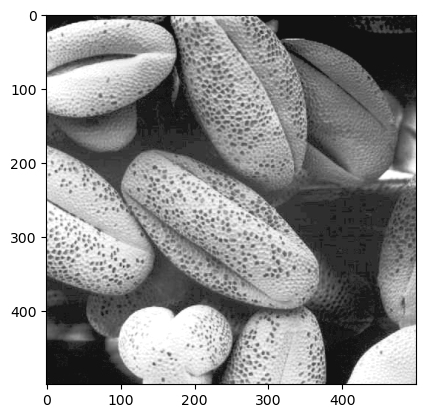

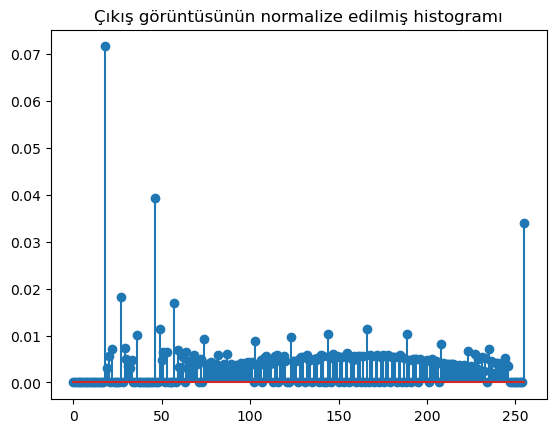

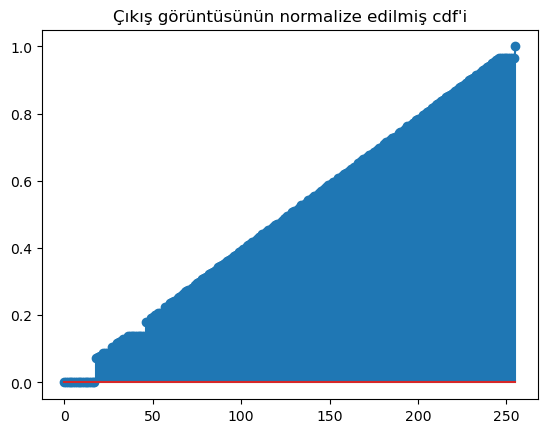

In [227]:
newData = histogramEqualization(data,cdf,width,height,maxval)
plt.imshow(newData,cmap='gray',vmin=0,vmax=255)
newHistogram = calculateHistogram(newData,width,height,maxval)
plt.figure()
plt.title("Çıkış görüntüsünün normalize edilmiş histogramı")
plt.stem(t,newHistogram)

plt.figure()
newcdf = calculateCdf(newHistogram,width,height,maxval)
plt.title("Çıkış görüntüsünün normalize edilmiş cdf'i")
plt.stem(t,newcdf)

### fig 3.38 image sharpening

In [242]:
def normalization(data):
    height = len(data)
    width = len(data[0])
    normalized = np.array([[0 for i in range(width)] for j in range(height)])
    minimum = np.min(data)
    maximum = np.max(data)
    normalized = 255*(data - minimum)/(maximum-minimum)
    return normalized        
    

P5
466 540
255
157 137 109
165 160 133
164 167 155


Text(0.5, 1.0, 'Giriş görüntüsü')

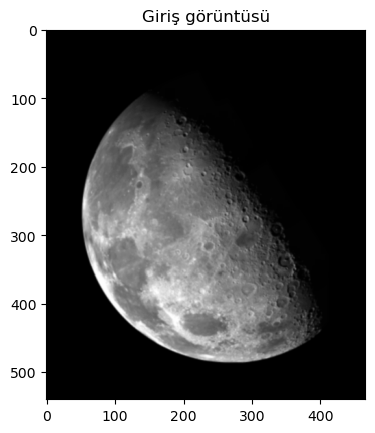

In [339]:
mw,width,height,maxval,img = mypgmread("fig0338.pgm")
print(f'{mw}\n{width} {height}\n{maxval}')
print(f'{img[210][200]} {img[210][201]} {img[210][202]}\n{img[211][200]} {img[211][201]} {img[211][202]}\n{img[212][200]} {img[212][201]} {img[212][202]}')
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
plt.title("Giriş görüntüsü")

### Yukarıdaki görüntü giriş görüntüsüdür.

In [260]:
def myLaplacian(width,height,img,mask,c):
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)],dtype=float)
    temp = img
    new_column = np.array([0 for i in range(height)]).reshape(height,1)
    for i in range(1*2):
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])
    new_row = np.array([0 for j in range(new_width)])
    for j in range(1*2):
        temp = np.vstack((temp,new_row))
    
    for i in range(1):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
#Buraya kadar olan kısımda matris uygulanacak maske için sıfırlarla genişletildi. Alttaki kısım ise maskenin uygulandığı kısımdır.
    for i in range(height):
        for j in range(width):
            sum = 0
            for r in range(0,3,1):
                for s in range(0,3,1):
                    sum = sum+c*mask[r][s]*temp[i+r][j+s]
            filteredImg[i][j] = sum
    
    
    return filteredImg

15.0 -3.0 -46.0
22.0 38.0 1.0
8.0 23.0 24.0


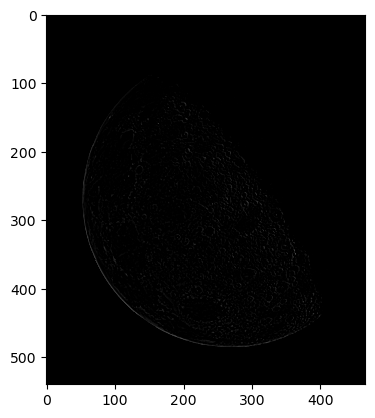

In [340]:
mask=([[0,-1,0],[-1,4,-1],[0,-1,0]])
newDataUnScaled = myLaplacian(width,height,img,mask,1)
print(f'{newDataUnScaled[210][200]} {newDataUnScaled[210][201]} {newDataUnScaled[210][202]}\n{newDataUnScaled[211][200]} {newDataUnScaled[211][201]} {newDataUnScaled[211][202]}\n{newDataUnScaled[212][200]} {newDataUnScaled[212][201]} {newDataUnScaled[212][202]}')

plt.imshow(newDataUnScaled,cmap="gray",vmin=0,vmax=255)

### Yukarıdaki görüntü orijinal görüntüye fig. 3.37(c) deki maskenin uygulanmasıyla elde edilmiştir. Scaling işlemi yapılmamıştır ve negatif değerli pikseller 0 olarak alınmıştır.

Text(0.5, 1.0, 'Normalize edilmiş laplacian')

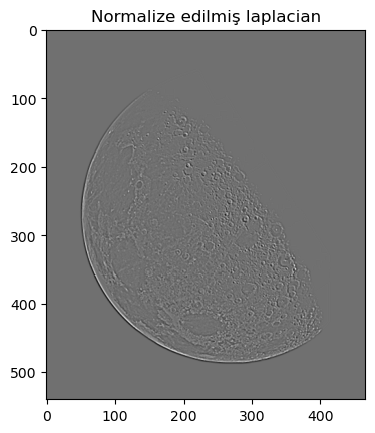

In [342]:
normalizedData = normalization(newDataUnScaled)
plt.imshow(normalizedData,cmap="gray",vmin=0,vmax=255)
plt.title("Normalize edilmiş laplacian")

In [ ]:
### YUKARIDAKİ SATIRDAN GEÇİCİ OLARAK KOYDUM. GEREKMİYORSA SİLİNECEK
for i in range(height):
        for j in range(width):
            if(newDataUnScaled[i][j]<0):
                newDataUnScaled[i][j]=0

Text(0.5, 1.0, 'Keskinleştirilmiş görüntü c=1')

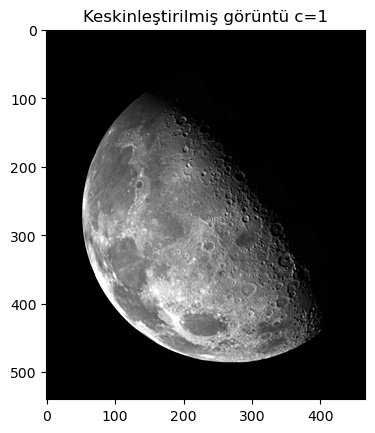

In [264]:
gxy = img + newDataUnScaled
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Keskinleştirilmiş görüntü c=1")

### maske uygulanmış görüntü giriş görüntüsüne eklendi ve yukarıdaki keskinleştirilmiş görüntü elde edildi.

172.0 134.0 63.0
187.0 198.0 134.0
172.0 190.0 179.0


Text(0.5, 1.0, 'Normalize edilmiş çıkış görüntüsü')

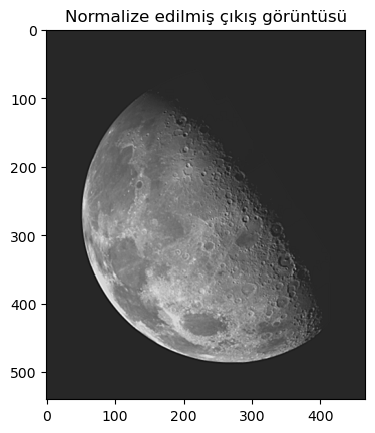

In [343]:
gxy = img + newDataUnScaled
print(f'{gxy[210][200]} {gxy[210][201]} {gxy[210][202]}\n{gxy[211][200]} {gxy[211][201]} {gxy[211][202]}\n{gxy[212][200]} {gxy[212][201]} {gxy[212][202]}')
normalizedGxy = normalization(gxy)
plt.imshow(normalizedGxy,cmap="gray",vmin=0,vmax=255)
plt.title("Normalize edilmiş çıkış görüntüsü")

### Yukarıdaki görüntü normalize edilmiş çıkış görüntüsüdür. Bu görüntüde ton biraz daha griye kaymıştır ve bana kalırsa normalize edilmeden önceki haline göre keskinliği azalmıştır. Bundan dolayı bu görüntünün bir üstündeki görüntü kitaptaki görüntüye de daha uygun olduğundan normalize etme işlemi bu son adımlarda yapılmayacaktır.

In [156]:
print(f'{gxy[0][0]} {gxy[0][1]} {gxy[0][2]}\n{gxy[1][0]} {gxy[1][1]} {gxy[1][2]}\n{gxy[2][0]} {gxy[2][1]} {gxy[2][2]}')


51.03014518452842 51.03014518452842 51.03014518452842
51.03014518452842 51.03014518452842 51.03014518452842
51.03014518452842 51.03014518452842 51.03014518452842


### fig 3.37(d)'deki diagonal maske

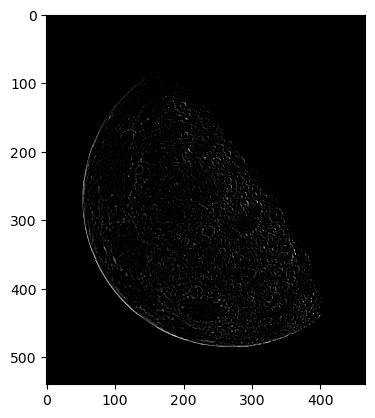

In [265]:
mask=([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
newDataUnScaled = myLaplacian(width,height,img,mask,1)

plt.imshow(newDataUnScaled,cmap="gray",vmin=0,vmax=255)

### Yukarıdaki görüntü giriş görüntüsüne fig. 3.37(d) deki maske c=1 için uygulanarak elde edilmiştir.

Text(0.5, 1.0, 'Keskinleştirilmiş görüntü (c=1 için diagonal maske)')

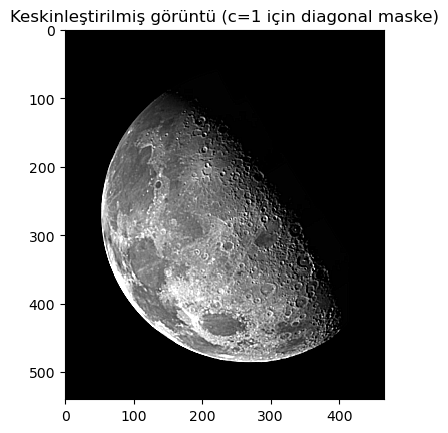

In [267]:
gxy = img + newDataUnScaled
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Keskinleştirilmiş görüntü (c=1 için diagonal maske)")

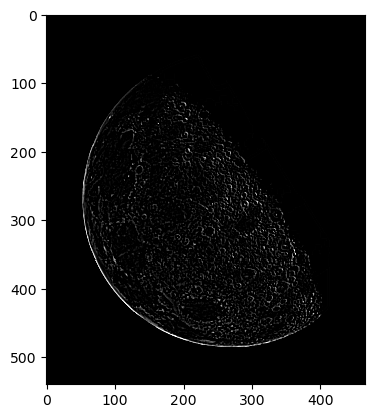

In [256]:
mask=([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
newData = myLaplacian(width,height,img,mask,1.5)
plt.imshow(newData,cmap="gray",vmin=0,vmax=255)


### Yukarıdaki görüntü giriş görüntüsüne c=1.5 diagonal maske uygulandığında elde edilmiştir. Görüldüğü gibi detaylar daha çok gözükmektedir. Orijinal görüntüye yukarıdaki görüntü eklendiğinde daha keskin bir görüntü elde edilmesi beklenmektedir.

Text(0.5, 1.0, 'Keskinleştirilmiş görüntü (c=1.5 için diagonal maske)')

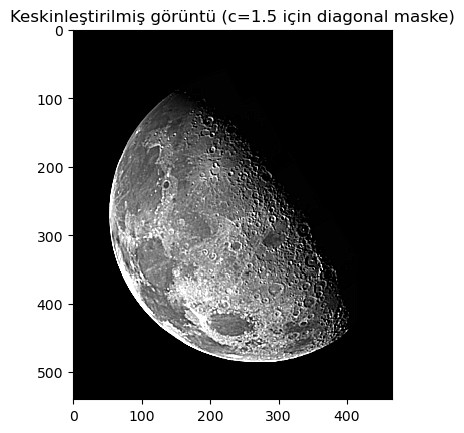

In [269]:
gxy = img + newData
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Keskinleştirilmiş görüntü (c=1.5 için diagonal maske)")

### Yukarıdaki görüntüden görüldüğü gibi c değeri 1.5 olarak alındığında görüntünün keskinliği daha da artmıştır.

Text(0.5, 1.0, 'c=2.5 için maskelenmiş ve scale edilmemiş görüntü')

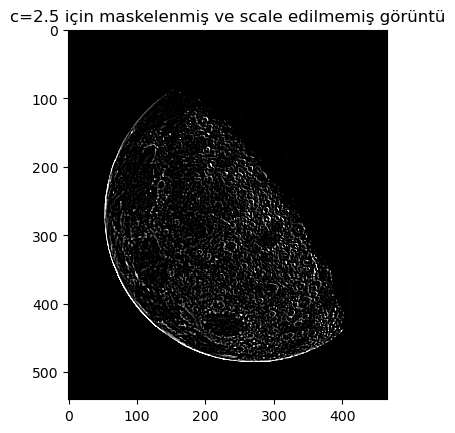

In [273]:
mask=([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
newData = myLaplacian(width,height,img,mask,2.5)
plt.imshow(newData,cmap="gray",vmin=0,vmax=255)
plt.title("c=2.5 için maskelenmiş ve scale edilmemiş görüntü")

Text(0.5, 1.0, 'Keskinleştirilmiş görüntü (c=2.5 için diagonal maske)')

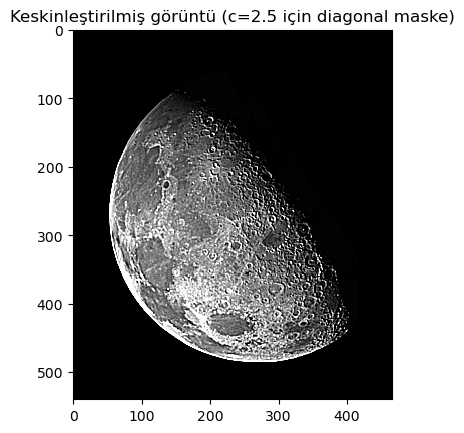

In [274]:
gxy = img + newData
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Keskinleştirilmiş görüntü (c=2.5 için diagonal maske)")

### Yukarıdaki görüntüde c=2.5 olarak alınmıştır. Bu keskinlik göz yormaya ve hafiften görüntüyü de bozmaya başlamıştır.

Text(0.5, 1.0, 'c=20 için maskelenmiş ve scale edilmemiş görüntü')

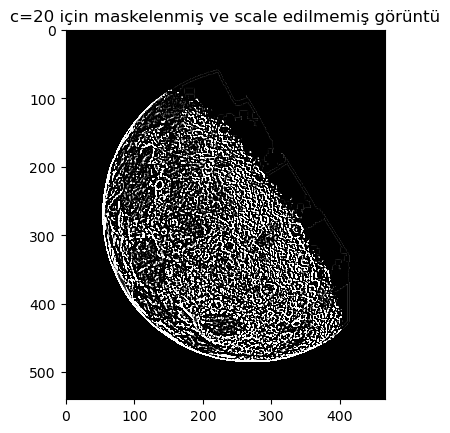

In [279]:
mask=([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
newData = myLaplacian(width,height,img,mask,20)
plt.imshow(newData,cmap="gray",vmin=0,vmax=255)
plt.title("c=20 için maskelenmiş ve scale edilmemiş görüntü")

Text(0.5, 1.0, 'Keskinleştirilmiş görüntü (c=20 için diagonal maske)')

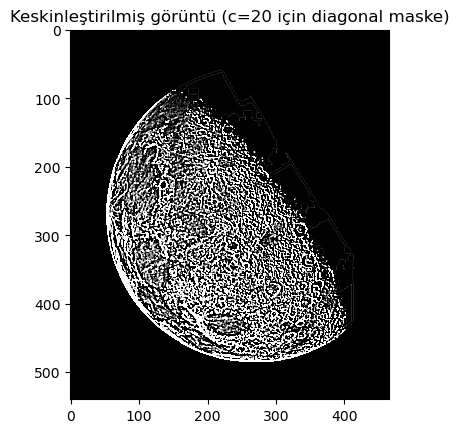

In [278]:
gxy = img + newData
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Keskinleştirilmiş görüntü (c=20 için diagonal maske)")

### Yukarıdaki görüntüye c=20 olarak alınmıştır. Görüldüğü üzere c değeri çok arttırıldığında görüntünün bozulmaktadır.

### 3.40

Width Height 320 138


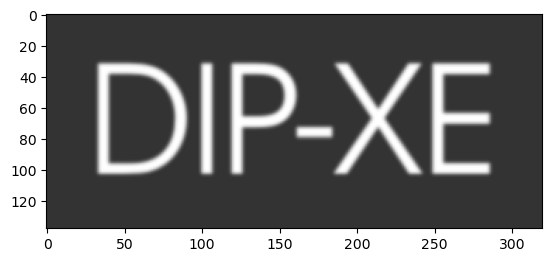

In [327]:
mw,width,height,maxval,img = mypgmread("fig0340.pgm")
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
print(f'Width Height {width} {height}')

In [328]:
def gaussKernel(l,sigma):
    z = (l-1)/2
    z = int(z)
    #x = np.linspace(-z,z,2*z+1,dtype=int)
    #y = np.linspace(-z,z,2*z+1,dtype=int)
    x = -z
    y = -z
    mask = np.array([[0 for i in range(l)] for j in range(l)],dtype=float)
    for i in range(l):
        for j in range(l):
            mask[i][j] = (1/(2*np.pi*sigma**2))*np.exp((-((x)**2+(y)**2))/(2*sigma**2))
            x = x+1
        y = y+1
        x = -z
    return mask

### Yukarıda gauss maskesi oluşturmak için yazılan fonksiyon görülmektedir. Değerler tamamiyle doğru olmasada orijinal gauss maskelerine yakın değerler vermektedir. İnternette yapılan araştırmalar sonucunda da tamamiyle doğru değerler veren bir fonksiyon bulunamadığından bu fonksiyonla devam edilmiştir. Burada kullanılan formül gauss fonksiyonunun formülüdür.

In [329]:
kernl = gaussKernel(5,1)
kernl*273


array([[ 0.79580168,  3.56653569,  5.88022325,  3.56653569,  0.79580168],
       [ 3.56653569, 15.98410401, 26.35333227, 15.98410401,  3.56653569],
       [ 5.88022325, 26.35333227, 43.44929946, 26.35333227,  5.88022325],
       [ 3.56653569, 15.98410401, 26.35333227, 15.98410401,  3.56653569],
       [ 0.79580168,  3.56653569,  5.88022325,  3.56653569,  0.79580168]])

### 5x5'likgauss maskesi için(sigma=1) örnek çıktı yukarıda verilmektedir. Tamamiyle aynı değerler olmasa da olması gereken değerlere yakın değerler elde edilmiştir.

In [330]:
def myImgCorrelationGauss(width,height,img,mask):
    temp = img
    l=len(mask)
    b=(l-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)])
    
    #Matrisi m ve n değerlerine göre 0 lar ile genişletiyoruz.
    new_column = np.array([0 for i in range(height)]).reshape(height,1)#oluşturulan vektörü sütun vektörü haline getiriyorum.
    for i in range(int(b)*2):#matrisin her tarafı sıfırlarla kaplanması için sütundan ve satırdan b değerinin 2 katı kadar koymalıyız
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])#yukarıda matrise sütun eklendiği için matrisin genişliği değişti. Bu yeni genişliği elde ediyorum.
    new_row = np.array([0 for j in range(new_width)])#Yeni genişlik uzunluğunda 0 satır vektörünü oluşturuyorum.
    for j in range(int(b)*2):#Aynı şekilde matrisin hem üstüne hem altına 0'lar gelmesi için a*2 yapıyorum.
        temp = np.vstack((temp,new_row))
    #Yukarıda eklenen satır ve sütunlar matrisin altına ve sağına eklendiği için tam istediğimiz forma henüz ulaşmamıştır. Bunu
    #istediğimiz forma sokmak için elimizdeki asıl değerleri hem alta hem de sağa doğru o yönde eklediğimiz vektör sayısının
    #yarısı kadar kaydırmamız gerekiyor. Örneğin sağa 2 ve alta 2 vektör eklediysek 1 sağa 1 de aşağı kaydırarak asıl orijinal
    #matrisi merkez kısma yerleştirmiş ve etrafını sıfırlarla kaplamış oluyoruz.
    for i in range(int(b)):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
        
    for i in range(height):
        for j in range(width):
            total = 0
            for r in range(0,l,1):
                for s in range(0,l,1):
                    total = total + mask[r][s]*temp[i+r][j+s]#Artık elimizde padding yapılmış bir matris olduğu için maskeyi
                    #özel şartlar koymadan genişletilmiş matris üstünde gezdirip average işlemini yapabiliriz.
            filteredImg[i][j] = total/np.sum(mask)
    return filteredImg
                    

Text(0.5, 1.0, 'Bulanık görüntü')

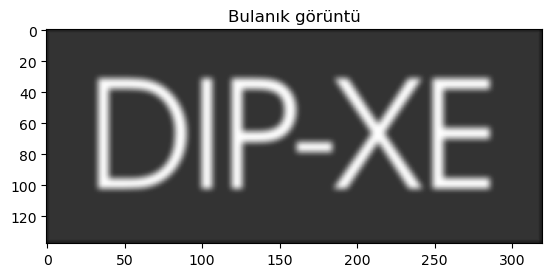

In [331]:
mask = gaussKernel(5,3)
newImg = myImgCorrelationGauss(width,height,img,mask)
plt.imshow(newImg,cmap="gray",vmin=0,vmax=255)
plt.title("Bulanık görüntü")

### Yukarıdaki şekil sigma=3 için 5x5'lik gauss maskesiyle görüntünün yumuşatılmış olan halidir.

-40

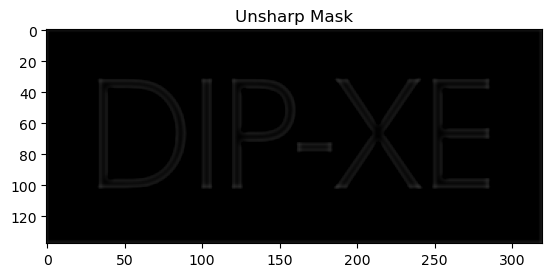

In [332]:
maske = img-newImg
plt.imshow(maske,cmap="gray",vmin=0,vmax=255)
plt.title("Unsharp Mask")
np.min(maske)

### Bulanık görüntüyü orijinal görüntüden çıkararak unsharp mask elde edildi. Kitaptaki görüntü yukarıdaki görüntü kadar karanlık değildi bunun sebebi bu görüntüde normalizasyon işleminin yapılmamış olması. Bundan kaynaklı negatif pikseller 0 olarak alınıyor ve görüntü karanlık gözüküyor. Bir alttaki hücrede normalizasyon işlemi yapılmaktadır.

0.0

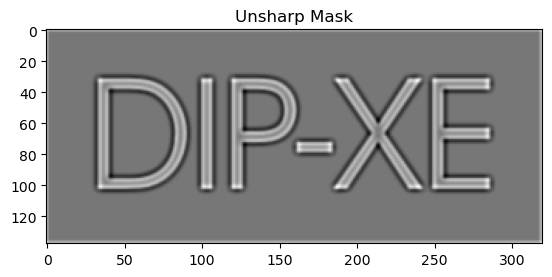

In [318]:
maske = normalization(maske)
plt.imshow(maske,cmap="gray",vmin=0,vmax=255)
plt.title("Unsharp Mask")
np.min(maske)

### Yukarıdaki görüntü normalizasyon işleminden sonra elde edilen unsharp maskenin görüntüsüdür.

Text(0.5, 1.0, 'Unsharp Masking sonucu')

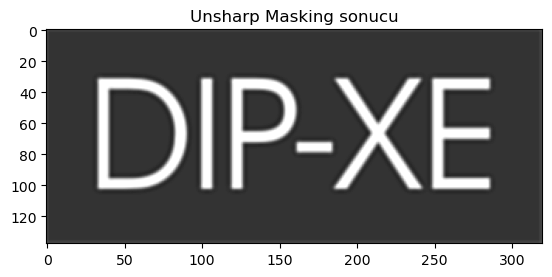

In [334]:
gxy = img+1*maske
#normalizedGxy = normalization(gxy)
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Unsharp Masking sonucu")

### k=1 için Unsharp masking işlemi gerçekleştirildi. k>1 olduğunda highboost filtering olacaktır. Aşağıdaki görüntüde highboost filtering görülmektedir.

Text(0.5, 1.0, 'Highboost Filtering')

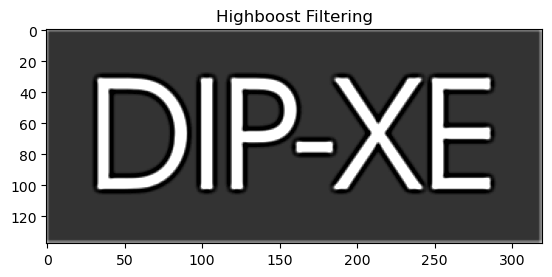

In [336]:
gxy = img+4.5*maske
#normalizedGxy = normalization(gxy)
plt.imshow(gxy,cmap="gray",vmin=0,vmax=255)
plt.title("Highboost Filtering")

### Son iki görüntü normalize edilmeden ekrana bastırılmıştır. Normalizasyon işlemi yapıldığında görüntü grimsi bir hal almakta ve keskinlik azalmaktadır.